In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

# loading and visulazing the data

In [8]:
dataset=pd.read_csv("D:\csv files\diabetes.csv")
print(len(dataset))
dataset.head()

768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:ylabel='Frequency'>

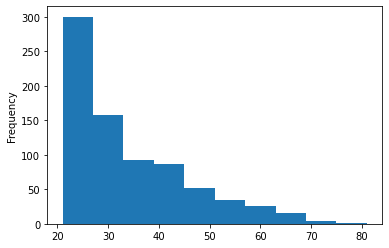

In [5]:
dataset["Age"].plot.hist()

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

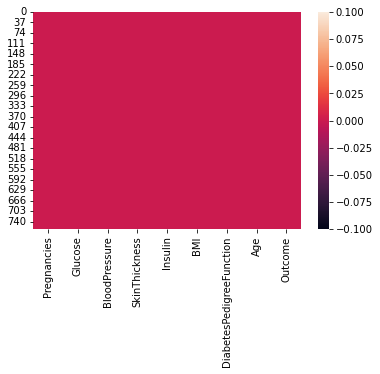

In [20]:
sns.heatmap(dataset.isnull())

In [14]:
# replacing zeros in columns with mean values
zero_columns=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for columns in zero_columns:
    dataset[column]=dataset[column].replace(0,np.NaN)
    mean=dataset[column].mean(skipna=True)
    dataset[column]=dataset[column].replace(np.NaN,mean)
    
    

In [15]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


#  splitting data

In [21]:
X=dataset.iloc[:,0:8]
Y=dataset.iloc[:,8]

In [22]:
# splitting data for traing and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33)

### feature scaling


In [32]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test=sc_X.transform(x_test)


array([[ 0.0642045 ,  1.17302755,  0.20862138, ...,  2.21926683,
        -0.68973974, -0.04742707],
       [-0.82771748, -1.65970208,  0.44983383, ...,  0.11062474,
        -0.12203374, -1.0154872 ],
       [ 2.73997043,  1.23968001,  3.34438331, ...,  1.3813958 ,
        -0.63111792,  1.00863853],
       ...,
       [ 0.95612648,  0.27321932, -0.35420769, ...,  0.85074415,
        -0.06958264,  0.92063306],
       [ 0.36151183, -0.16002169,  0.12821722, ..., -0.95067856,
        -0.80389801, -0.223438  ],
       [-1.1250248 ,  1.47296363,  1.41468366, ...,  2.77784751,
        -0.10660695, -0.83947627]])

## fitting the model


In [34]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
model = KNeighborsClassifier(n_neighbors = k, p=2, metric="euclidean")
model.fit(x_train,y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [36]:
## predicting the test set rules
y_pred = model.predict(x_test)

#  Evaluting the model

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[146,  17],
       [ 46,  45]], dtype=int64)

In [40]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7519685039370079

In [41]:

from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.5882352941176471

### What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.

In [43]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    model = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mean_acc[n-1] = accuracy_score(y_test, y_pred)

    
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.68897638, 0.70472441, 0.72440945, 0.7519685 , 0.72834646,
       0.7519685 , 0.7480315 , 0.75590551, 0.75590551, 0.76377953,
       0.7519685 , 0.76377953, 0.76771654, 0.77952756, 0.76377953,
       0.77952756, 0.76771654, 0.76771654, 0.75984252])

### Plot the model accuracy for a different number of neighbors.

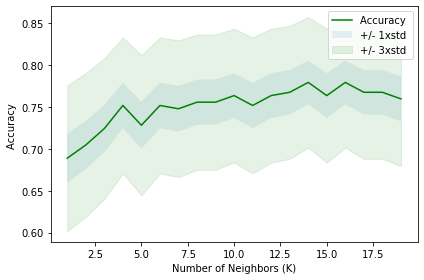

In [45]:
import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [46]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7795275590551181 with k= 14
